In [1]:
#problema entender o churn de uma empresa de  assinatura 

In [7]:
import pandas as pd
from scipy import stats
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import seaborn as sns


In [8]:
#importando a base

data=pd.read_csv('C:/Users/fgeba/Downloads/Customers Exited.csv')

In [9]:
# vizualizando a base 
data

,RowNumber,CustomerId,Surname,SpendingScore,Location,Gender,Age,Time(in yrs),#ofSubscriptions,HasShoppingCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,2,1,0,92888.52,1


In [10]:
# analise de outlier 
data.describe()

,RowNumber,CustomerId,SpendingScore,Age,Time(in yrs),#ofSubscriptions,HasShoppingCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
#como nao gemos nenhum valor maximo acima de 2X o p75 podemos dizer que nao temos outlier  


In [12]:
#ANALISE GRAFICAS DAS VARIAVEIS


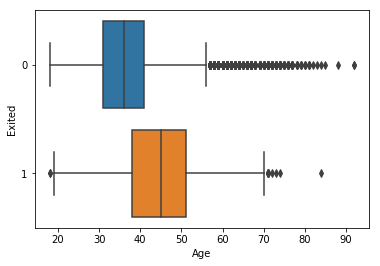

In [15]:
 #age temos uma diferenca apaarente   
    sns.boxplot(
        x="Age",
        y='Exited',
        data=data,
        orient="h",
    )

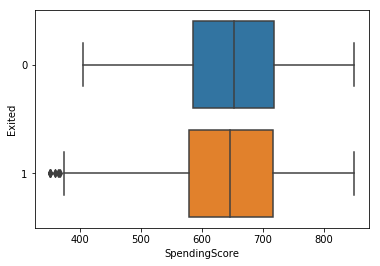

In [21]:

    sns.boxplot(
        x="SpendingScore",
        y='Exited',
        data=data,
        orient="h",
    )
    

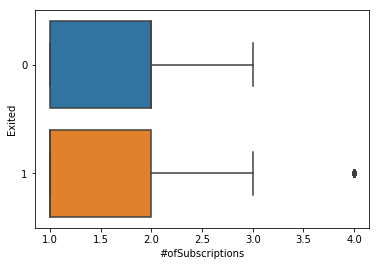

In [24]:

    sns.boxplot(
        x="#ofSubscriptions",
        y='Exited',
        data=data,
        orient="h",
    )

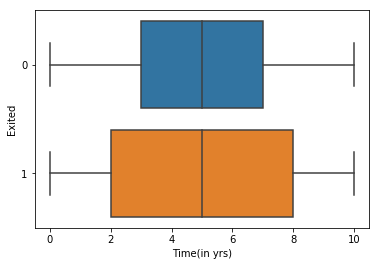

In [25]:
    sns.boxplot(
        x="Time(in yrs)",
        y='Exited',
        data=data,
        orient="h",
    )

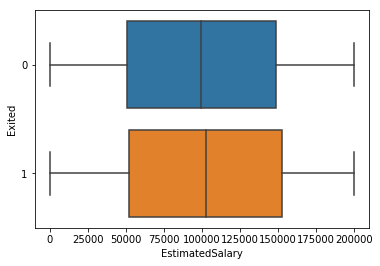

In [27]:
    sns.boxplot(
        x="EstimatedSalary",
        y='Exited',
        data=data,
        orient="h",
    )

In [28]:
#verificacao de null 
data.isnull().sum()

RowNumber           0
CustomerId          0
Surname             0
SpendingScore       0
Location            0
Gender              0
Age                 0
Time(in yrs)        0
#ofSubscriptions    0
HasShoppingCard     0
IsActiveMember      0
EstimatedSalary     0
Exited              0
dtype: int64

In [172]:
# nao temos null 

In [29]:
# analise cruzada de alguns campos 
data.pivot_table('Exited',index=['Location'],aggfunc=['count','mean'])

,count,mean
,Exited,Exited
Location,,
France,5014,0.161548
Germany,2509,0.324432
Spain,2477,0.166734


In [30]:
#dummy de alguns campos
data['Gender_f']=np.where(data['Gender']=='Female',1,0)
data['Location_ger']=np.where(data['Location']=='Germany',1,0)
data['Location_fra']=np.where(data['Location']=='France',1,0)

In [31]:
# analise de correlacao
data.corr()

,RowNumber,CustomerId,SpendingScore,Age,Time(in yrs),#ofSubscriptions,HasShoppingCard,IsActiveMember,EstimatedSalary,Exited,Gender_f,Location_ger,Location_fra
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,0.007246,0.000599,0.012044,-0.005988,-0.016571,-0.018196,-0.000044,0.008590
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,0.016972,-0.014025,0.001665,0.015271,-0.006248,0.002641,-0.003097,-0.004049
SpendingScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.002857,0.005538,-0.008928
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.027544,0.046897,-0.039208
Time(in yrs),-0.006495,-0.014883,0.000842,-0.009997,1.000000,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.014733,-0.000567,-0.002848
#ofSubscriptions,0.007246,0.016972,0.012238,-0.030680,0.013444,1.000000,0.003183,0.009612,0.014204,-0.047820,0.021859,-0.010419,0.001230
HasShoppingCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005766,0.010577,0.002467
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.022544,-0.020486,0.003317
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.008112,0.010297,-0.003332
Exited,-0.016571,-0.006248,-0.027094,0.285323,-0.014001,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.106512,0.173488,-0.104955


temos que idade e location ger sao as variaveis com mais correlacao

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RowNumber         10000 non-null  int64  
 1   CustomerId        10000 non-null  int64  
 2   Surname           10000 non-null  object 
 3   SpendingScore     10000 non-null  int64  
 4   Location          10000 non-null  object 
 5   Gender            10000 non-null  object 
 6   Age               10000 non-null  int64  
 7   Time(in yrs)      10000 non-null  int64  
 8   #ofSubscriptions  10000 non-null  int64  
 9   HasShoppingCard   10000 non-null  int64  
 10  IsActiveMember    10000 non-null  int64  
 11  EstimatedSalary   10000 non-null  float64
 12  Exited            10000 non-null  int64  
 13  Gender_f          10000 non-null  int32  
 14  Location_ger      10000 non-null  int32  
 15  Location_fra      10000 non-null  int32  
dtypes: float64(1), int32(3), int64(9), object

In [33]:
from sklearn.model_selection import train_test_split
feature_cols = [
'SpendingScore',           
'Age'     ,        
'Time(in yrs)',        
'#ofSubscriptions',    
'HasShoppingCard'  ,  
'IsActiveMember'    ,
'EstimatedSalary'   ,            
'Gender_f'          ,
'Location_ger'       ,
'Location_fra'      ,


]
X=data[feature_cols]

y=data['Exited']

from sklearn.preprocessing import StandardScaler


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
scaler = StandardScaler()
# fit and transform the data
X_train = scaler.fit_transform(X_train) 

X_test = scaler.fit_transform(X_test) 

In [35]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=5, random_state=0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [36]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(model.score(X_train, y_train), 
                                                                                        
                                                                                             model.score(X_test, y_test)))



[[1531   54]
 [ 325   90]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1585
           1       0.62      0.22      0.32       415

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.61      2000
weighted avg       0.78      0.81      0.77      2000

0.8105
R^2 Training Score: 0.81  
R^2 Validation Score: 0.81


In [37]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
coefficients

,0,0
0,SpendingScore,-0.066352
1,Age,0.747355
2,Time(in yrs),-0.033236
3,#ofSubscriptions,-0.092511
4,HasShoppingCard,-0.028305
5,IsActiveMember,-0.540641
6,EstimatedSalary,0.056027
7,Gender_f,0.275407
8,Location_ger,0.380468
9,Location_fra,-0.005598


logo idade eh a varivel mais influente no cliente deixar ou nao a empresa


modelo base usando o pycaret

In [38]:
from pycaret.classification import *

In [40]:
clf1 = setup(data = data, 
             target = 'Exited',
             ignore_features =['Location','Surname'],
             numeric_imputation = 'mean',
          #   feature_selection=True,
             normalize = True,
             transformation=True,
             polynomial_features=True,
         #    feature_ratio=True,
             feature_interaction=True
             
             )

,Description,Value
0,session_id,7800
1,Target,Exited
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(10000, 16)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8563,0.8401,0.4562,0.7617,0.5697,0.4898,0.5136,7.0390
gbc,Gradient Boosting Classifier,0.8561,0.8467,0.4719,0.7459,0.5774,0.4960,0.5153,0.6960
lightgbm,Light Gradient Boosting Machine,0.8511,0.8317,0.4589,0.7278,0.5623,0.4782,0.4970,0.2540
rf,Random Forest Classifier,0.8493,0.8252,0.4425,0.7303,0.5502,0.4662,0.4878,0.3270
ada,Ada Boost Classifier,0.8488,0.8353,0.4678,0.7117,0.5634,0.4768,0.4927,0.1780
et,Extra Trees Classifier,0.8445,0.8187,0.4473,0.7029,0.5456,0.4574,0.4750,0.3850
lr,Logistic Regression,0.8440,0.8348,0.4075,0.7248,0.5209,0.4365,0.4627,0.6830
xgboost,Extreme Gradient Boosting,0.8427,0.8139,0.4589,0.6857,0.5487,0.4580,0.4722,0.9820
lda,Linear Discriminant Analysis,0.8417,0.8282,0.4164,0.7044,0.5227,0.4354,0.4573,0.0660
ridge,Ridge Classifier,0.8375,0.0000,0.3308,0.7530,0.4584,0.3798,0.4248,0.0750


In [74]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8386,0.8216,0.3688,0.6842,0.4793,0.3937,0.4201
1,0.8714,0.8400,0.4752,0.8072,0.5982,0.5277,0.5540
2,0.8486,0.8387,0.3944,0.7368,0.5138,0.4337,0.4634
3,0.8400,0.7844,0.3803,0.6923,0.4909,0.4054,0.4310
4,0.8429,0.7962,0.4014,0.6951,0.5089,0.4233,0.4459
5,0.8686,0.8369,0.5070,0.7660,0.6102,0.5350,0.5515
6,0.8600,0.8099,0.4366,0.7750,0.5586,0.4830,0.5111
7,0.8529,0.8521,0.4507,0.7191,0.5541,0.4715,0.4900
8,0.8586,0.8413,0.4577,0.7471,0.5677,0.4889,0.5099
9,0.8584,0.8454,0.4823,0.7234,0.5787,0.4977,0.5124


In [70]:
tuned_cb = tune_model(cb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8600,0.8605,0.4823,0.7312,0.5812,0.5014,0.5170
1,0.8600,0.8447,0.4681,0.7416,0.5739,0.4952,0.5140
2,0.8800,0.8626,0.4859,0.8625,0.6216,0.5568,0.5892
3,0.8729,0.8731,0.5282,0.7732,0.6276,0.5542,0.5688
4,0.8443,0.8280,0.4437,0.6774,0.5362,0.4475,0.4619
5,0.8729,0.8542,0.4296,0.8841,0.5782,0.5137,0.5602
6,0.8557,0.8232,0.4577,0.7303,0.5628,0.4818,0.5006
7,0.8471,0.8430,0.4437,0.6923,0.5408,0.4543,0.4705
8,0.8586,0.8329,0.4225,0.7792,0.5479,0.4727,0.5039
9,0.8555,0.8667,0.4184,0.7564,0.5388,0.4614,0.4899


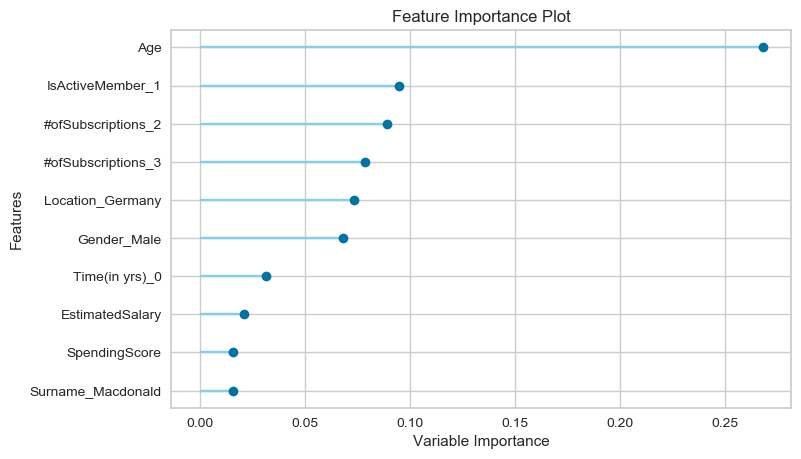

In [71]:
plot_model(tuned_cb, plot='feature')

criacao de festures com base no pycaret

In [42]:
data['age_mult_#ofSubscriptions']=data['Age']*data['#ofSubscriptions']
data['age_mult_location_ger']=data['Age']*data['Location_ger']
data['age_mult_IsActiveMember']=data['Age']*data['IsActiveMember']

In [47]:
from sklearn.model_selection import train_test_split

# seed the pseudorandom number generator
from random import seed
from random import random
# seed random number generator
seed(1)
data['random']=random()

feature_cols = [
    'random',
'SpendingScore',           
'Age'     ,        
'Time(in yrs)',        
#'#ofSubscriptions',    
'HasShoppingCard'  ,  
'IsActiveMember'    ,
'EstimatedSalary'   ,            
'Gender_f'          ,
'Location_ger'       ,
'Location_fra'      ,
'age_mult_#ofSubscriptions',
#'age_mult_location_ger',    
'age_mult_IsActiveMember'
]
X=data[feature_cols]

y=data['Exited']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [49]:
 from sklearn.ensemble import GradientBoostingClassifier
    
clf = GradientBoostingClassifier(n_estimators=50, learning_rate=1.4,
     max_depth=3, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.837

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


print('R^2 Training Score: {:.2f}  \nR^2 Validation Score: {:.2f}'.format(clf.score(X_train, y_train), 
                                                                                        
                                                                                             clf.score(X_test, y_test)))



[[1478   97]
 [ 229  196]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1575
           1       0.67      0.46      0.55       425

    accuracy                           0.84      2000
   macro avg       0.77      0.70      0.72      2000
weighted avg       0.82      0.84      0.83      2000

0.837
R^2 Training Score: 0.89  
R^2 Validation Score: 0.84


In [51]:
#analise de influencia da variavel no f1 final do modelo 
from sklearn.metrics import mean_squared_error

dt=pd.DataFrame(['0'])
dt2=pd.DataFrame([])


for i  in range(0, 20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 
    for column in X.columns:
        X1=X_train.drop(column, axis=1) 
        X2=X_test.drop(column, axis=1) 
        clf = GradientBoostingClassifier(n_estimators=30,max_depth=4, random_state=0).fit(X1, y_train)
        y_pred = clf.predict(X2)
        dt['i']=i
        dt['var']=column
        dt['mse']=mean_squared_error(y_test, y_pred)
        dt["Precision"]=metrics.precision_score(y_test, y_pred)
        dt["Recall"]=metrics.recall_score(y_test, y_pred)
        dt['r2_treino']=clf.score(X1, y_train)
        dt['r2_val']=clf.score(X2, y_test)
        dt['f1']=(dt["Precision"]+dt["Recall"])/2
        #print(mean_squared_error(y_test, y_pred))
        dt2 = pd.concat([dt2.reset_index(drop=True),dt.reset_index(drop=True)])


In [52]:
dt2.sort_values(by=['f1'], inplace=True)


In [53]:
dt2.pivot_table('f1',index=['var'],aggfunc=['count','mean'])

,count,mean
,f1,f1
var,,
Age,20,0.516195
EstimatedSalary,20,0.608834
Gender_f,20,0.606441
HasShoppingCard,20,0.611099
IsActiveMember,20,0.611263
Location_fra,20,0.609223
Location_ger,20,0.592783
SpendingScore,20,0.605954


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

gbc = GradientBoostingClassifier()

parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10,20,30,40]
    }

clf = GridSearchCV(gbc, parameters)

clf.fit(X_train, y_train)

print(clf.best_params_)


In [ ]:
print (clf.best_params_)